<a href="https://colab.research.google.com/github/aysbt/Udacity/blob/master/Pytorch_Fashion_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **İmage Recognition using Pytorch with Fashion MNIST DataSet** 

The Fashion MNIST Datasets contain a set of  28x28 grayscale images of clotes. Our goal is building a neural network using Pytorch and then training the network to predict clothes.
*italicized text*

In [0]:
#importing required libraries..
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data.sampler import  SubsetRandomSampler  #for validation test

# **Load and Visualize the Data**

In [0]:
#Define a transform to convert to images to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),)]) #mean and std have to be sequences (e.g., tuples), therefore we should add a comma after the values
                          
#Load the data: train and test sets
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)

#Preparin for validaion test
indices = list(range(len(trainset)))
np.random.shuffle(indices)
#to get 20% of the train set
split = int(np.floor(0.2 * len(trainset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])

#Data Loader
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



# **Visualize a Batch of Training Data**

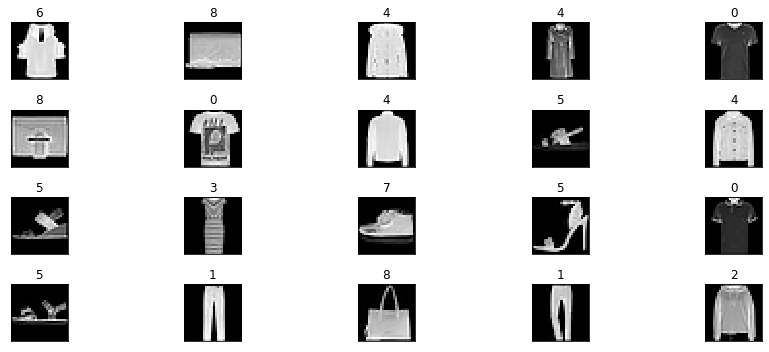

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = dataiter.next()


fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  # xticks=[], yticks=[] is empty to print the images without any ticks around them
  #np.sqeeze : Remove single-dimensional entries from the shape of an array.
  ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
   # .item() gets the value contained in a Tensor
  ax.set_title(labels[idx].item())
  fig.tight_layout()

# **Building the Network**

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    #defining the 20% dropout
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    #not using dropout on output layer
    x = F.log_softmax(self.fc4(x), dim=1)
    return x


In [84]:
model = Classifier()
#defining the loss function
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


valid_loss_min = np.Inf #using this high value to make sure the update the weight first time
epochs = 30
steps = 0

train_losses, test_losses, valid_losses = [],[],[]
for e in range(epochs):
  running_loss =0 
  valid_loss = 0
  for images, labels in trainloader:

     optimizer.zero_grad()
     log_ps = model(images)
     loss = criterion(log_ps, labels)
     loss.backward()
     optimizer.step()
     running_loss += loss.item()

  for images, labels in validloader:
     log_ps = model(images)
     loss = criterion(log_ps, labels)
     valid_loss += loss.item()*images.size(0)

  running_loss = running_loss/len(trainloader.sampler)
  valid_loss =  valid_loss/len(validloader.sampler)
  train_losses.append(running_loss)
  valid_losses.append(valid_loss)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        e+1,
        running_loss,
        valid_loss
    ))

  if valid_loss <= valid_loss_min:
      print('validation loss decreased({:.6f} -->{:.6f}). Saving Model ...'.format(valid_loss_min, valid_loss))
      torch.save(model.state_dict(), 'model.pt')
      valid_loss_min = valid_loss

  




Epoch: 1 	Training Loss: 0.013084 	Validation Loss: 0.626188
validation loss decreased(inf -->0.626188). Saving Model ...
Epoch: 2 	Training Loss: 0.009133 	Validation Loss: 0.563672
validation loss decreased(0.626188 -->0.563672). Saving Model ...
Epoch: 3 	Training Loss: 0.008103 	Validation Loss: 0.533712
validation loss decreased(0.563672 -->0.533712). Saving Model ...
Epoch: 4 	Training Loss: 0.007694 	Validation Loss: 0.591513
Epoch: 5 	Training Loss: 0.007525 	Validation Loss: 0.509847
validation loss decreased(0.533712 -->0.509847). Saving Model ...
Epoch: 6 	Training Loss: 0.007069 	Validation Loss: 0.497303
validation loss decreased(0.509847 -->0.497303). Saving Model ...
Epoch: 7 	Training Loss: 0.006856 	Validation Loss: 0.502875
Epoch: 8 	Training Loss: 0.006622 	Validation Loss: 0.520244
Epoch: 9 	Training Loss: 0.006364 	Validation Loss: 0.491889
validation loss decreased(0.497303 -->0.491889). Saving Model ...
Epoch: 10 	Training Loss: 0.006446 	Validation Loss: 0.49190

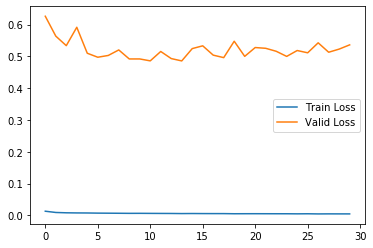

In [85]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')

plt.legend()